### Sample analysis using BTC live data


In [24]:
# importing necessary libraries

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sb

In [25]:
# generating BTC data from yahoo finance from 2014 to the current day

bit_data = yf.download(
    'BTC-USD',
    start_date='2014-01-01',
    end_date=dt.datetime.now(),
    progress=False
)

In [26]:
# saves BTC data as a csv file

bit_data.to_csv('BTC_data.csv', index=True)

In [27]:
# reads and displays last 5 records

data = pd.read_csv('BTC_data.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2859,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,21190.316406,24302954056
2860,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083
2861,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,22485.689453,39974475562
2862,2022-07-19,22467.849609,23666.962891,21683.406250,23389.433594,23389.433594,48765202697
2863,2022-07-21,23393.863281,24195.335938,23021.623047,23240.767578,23240.767578,42855137280


In [7]:
# 

closing_price = data['Close']
date = data['Date'] = pd.to_datetime(data['Date'])
bit_data = data[['Date', 'Close']]

bitcoin = bit_data.set_index('Date')
bitcoin.sort_index(inplace=True)

# print(type(bitcoin))
print(bitcoin.head())

<class 'pandas.core.frame.DataFrame'>
                 Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014


In [8]:
type(bitcoin)

pandas.core.frame.DataFrame

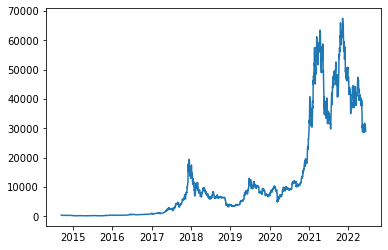

Wall time: 271 ms


In [9]:

plt.plot(bitcoin)
plt.show()

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03
mean,12343.222356,12665.393244,11985.455188,12352.070638,12352.070638,1.528569e+10
std,16636.916143,17067.505218,16140.143925,16635.018828,16635.018828,1.992926e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,624.013000,630.622009,616.770508,624.329010,624.329010,8.529705e+07
50%,6500.509766,6611.839844,6408.160156,6506.069824,6506.069824,5.631310e+09
75%,11361.438477,11600.270508,11057.170410,11362.767578,11362.767578,2.610013e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


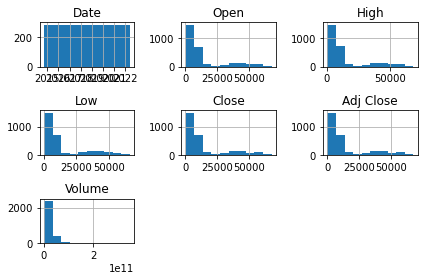

In [10]:
data.hist()

plt.tight_layout()
plt.show()

In [11]:
corr = data.corr(method='pearson')


In [12]:
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999530,0.999128,0.998830,0.998830,0.723997
High,0.999530,1.000000,0.999056,0.999488,0.999488,0.727894
Low,0.999128,0.999056,1.000000,0.999395,0.999395,0.716011
Close,0.998830,0.999488,0.999395,1.000000,1.000000,0.722904
Adj Close,0.998830,0.999488,0.999395,1.000000,1.000000,0.722904
Volume,0.723997,0.727894,0.716011,0.722904,0.722904,1.000000


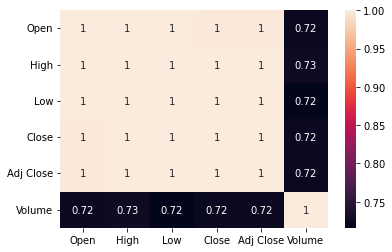

In [13]:
sb.heatmap(corr,annot=True)
plt.show()

In [14]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
from sklearn.preprocessing import Normalizer

In [16]:
normalizer = Normalizer(norm='l1').fit(data[data.columns[1:6]])

In [17]:
normalized_data = normalizer.transform(data[data.columns[1:6]])

In [18]:
normalized_data[0:3]

array([[0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
       [0.21, 0.21, 0.19, 0.2 , 0.2 ],
       [0.21, 0.21, 0.19, 0.19, 0.19]])